In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv",delimiter = ",") #delimiter is used to seperate the values in my dataset by comma
data.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [3]:
data.shape

(7176, 5)

In [5]:
# We will be using hourly electrical energy output (EP) for now, so we will save the EP column data in another variable and drop the column from our original dataset
y_train = data[' EP']

In [6]:
del data[' EP']

In [7]:
data.head()

,# T,V,AP,RH
0,8.58,38.38,1021.03,84.37
1,21.79,58.20,1017.21,66.74
2,16.64,48.92,1011.55,78.76
3,31.38,71.32,1009.17,60.42
4,9.20,40.03,1017.05,92.46


In [8]:
# Let's check our y_train too
y_train.head()

0    482.26
1    446.94
2    452.56
3    433.44
4    480.38
Name:  EP, dtype: float64

In [9]:
data.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [10]:
# Check for missing values in my dataset
data.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [11]:
data.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

###### So we conclude that there is no missing value in our data set

In [12]:
# Statistics
min_EP= np.min(y_train) 
max_EP = np.max(y_train)
mean_EP = np.mean(y_train)
median_EP = np.median(y_train) 
std_EP = np.std(y_train) 

#Quartile Calculations
first_quartile = np.percentile(y_train, 25)
third_quartile = np.percentile(y_train, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Combined Cycle Power Plant dataset:\n")
print("Minimum EP: ",min_EP)
print("Maximum EP: ",max_EP)
print("Mean EP: ",mean_EP)
print("Median EP: ",median_EP)
print("Standard deviation of EP: ",std_EP)
print("First quartile of EP: ",first_quartile)
print("Second quartile of EP: ",third_quartile)
print("Interquartile (IQR) of EP: ",inter_quartile)

Statistics for Combined Cycle Power Plant dataset:

Minimum EP:  420.26
Maximum EP:  495.76
Mean EP:  454.43129319955347
Median EP:  451.74
Standard deviation of EP:  17.13337725345268
First quartile of EP:  439.7375
Second quartile of EP:  468.6675
Interquartile (IQR) of EP:  28.930000000000007


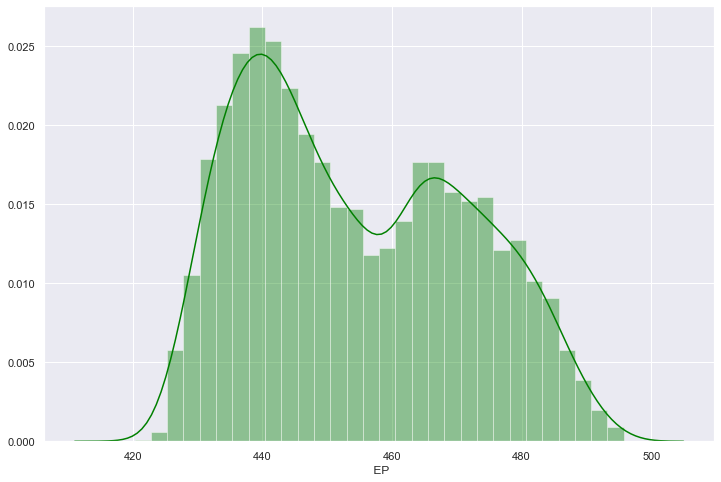

In [17]:
# visualising the data
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(y_train, bins=30, color='green')
plt.show()

## Correlation between value of each other in dataset

In [18]:
corr_df = data.copy()
corr_df['EP'] = y_train
corr_df.head(10)

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38
5,26.82,69.23,1013.28,50.86,436.36
6,9.48,40.80,1023.82,78.98,485.36
7,9.41,41.54,1019.48,82.19,481.59
8,31.03,69.59,1007.77,63.96,432.56
9,18.24,59.15,1012.00,84.40,449.48


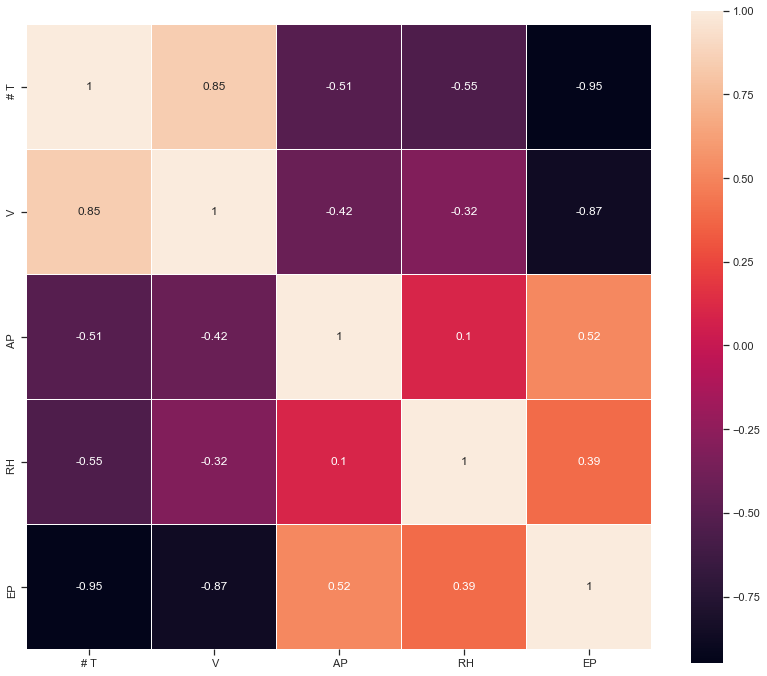

In [20]:
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14,12))
sns.heatmap(corr_df.astype('float32').corr(), linewidths=0.2, square=True, annot=True)
plt.show()

## Feature plot

In [21]:
data.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

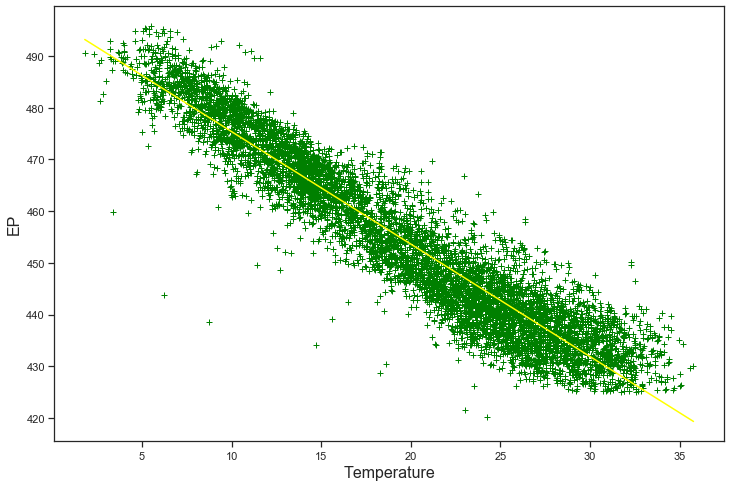

In [22]:
plt.plot(corr_df["# T"],corr_df["EP"], '+', color='green')
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df["# T"], corr_df['EP'], 1))
         (np.unique(corr_df['# T'])), color='yellow')
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

##### We plotted all 7176 values of the data set of EP vs temperature. For using the value of at any particular point, we have used the np.poly function which finds the slope of line 

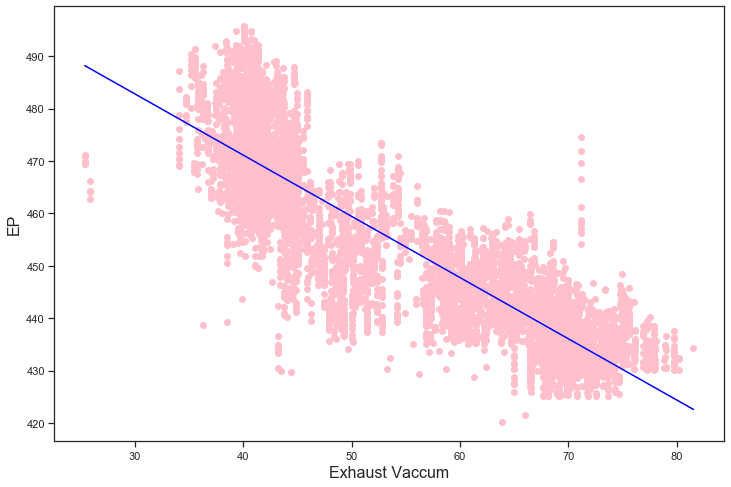

In [23]:
plt.plot(corr_df[" V"],corr_df["EP"], 'o', color='pink')
plt.plot(np.unique(corr_df[' V']), np.poly1d(np.polyfit(corr_df[" V"], corr_df['EP'], 1))
         (np.unique(corr_df[' V'])), color='blue')
plt.xlabel("Exhaust Vaccum", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

##### Plotted the values from dataset of EP vs Exhaust Vaccum

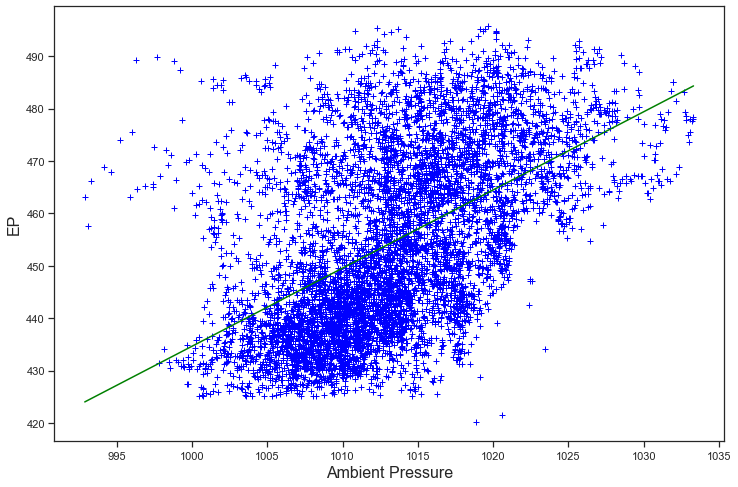

In [24]:
plt.plot(corr_df[" AP"],corr_df["EP"], '+', color='blue')
plt.plot(np.unique(corr_df[' AP']), np.poly1d(np.polyfit(corr_df[" AP"], corr_df['EP'], 1))
         (np.unique(corr_df[' AP'])), color='green')
plt.xlabel("Ambient Pressure", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

##### Plotted the values from dataset of EP vs Ambient Pressure

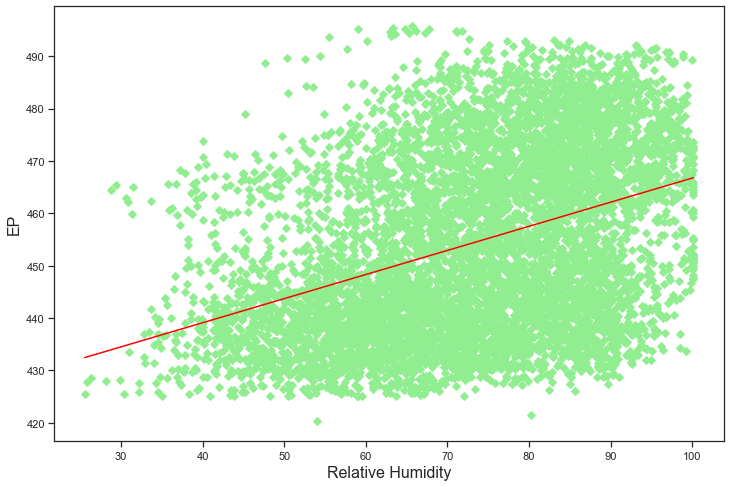

In [27]:
plt.plot(corr_df[" RH"],corr_df["EP"], 'D', color='lightgreen')
plt.plot(np.unique(corr_df[' RH']), np.poly1d(np.polyfit(corr_df[" RH"], corr_df['EP'], 1))
         (np.unique(corr_df[' RH'])), color='red')
plt.xlabel("Relative Humidity", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.show()

##### Plotted the values from dataset of EP vs Relative Humidity

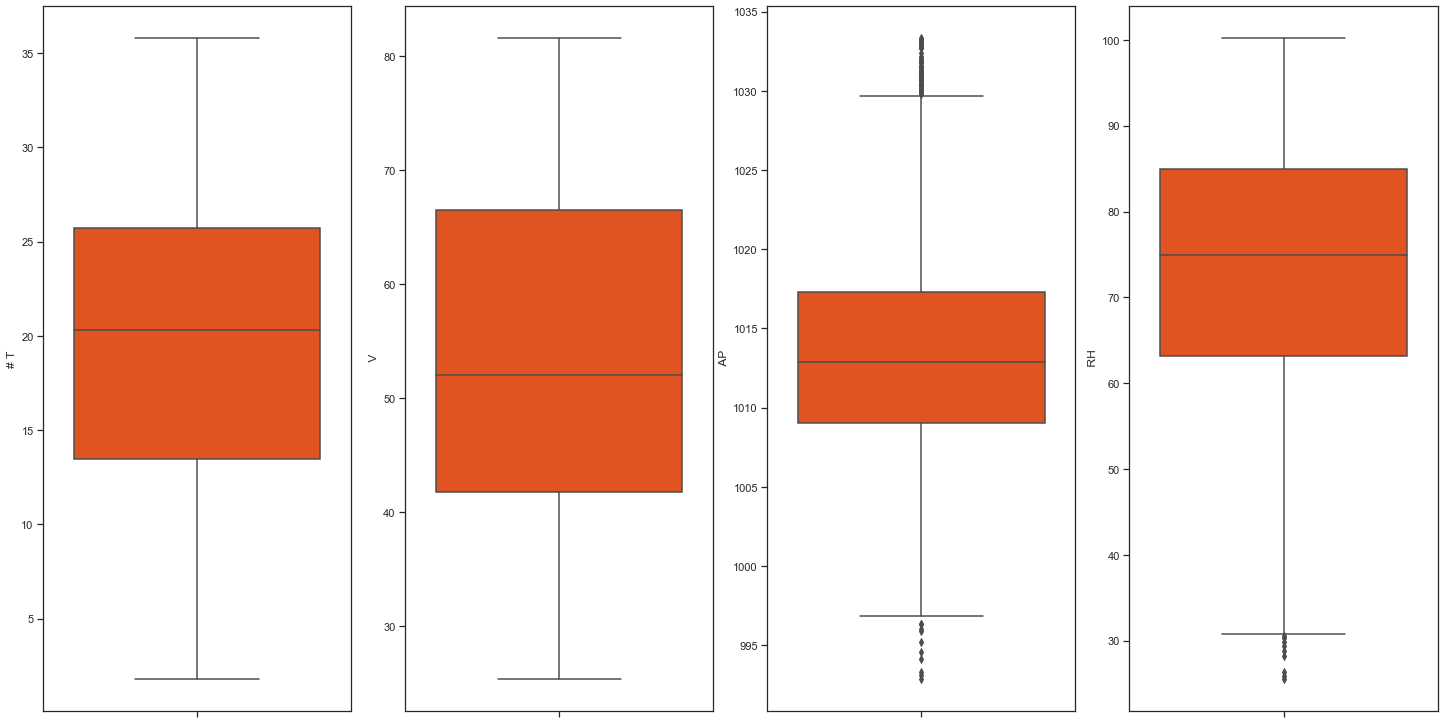

In [28]:
fig, axs =plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index=0
axs = axs.flatten()
for i,v in data.items():
    sns.boxplot(y=i, data=data, ax=axs[index], color='orangered')
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

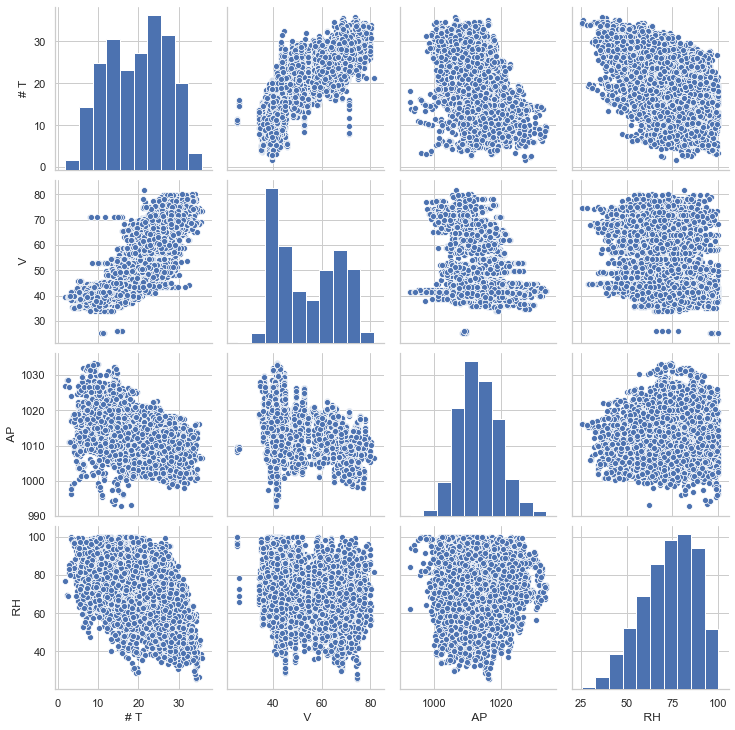

In [29]:
#pairplot
sns.set(style='whitegrid')
features_plot =data.columns

sns.pairplot(data[features_plot]);
plt.tight_layout
plt.show()

##### This is how our vlues related to each other. Please note that the scaling is not equal. So, we will scale the values

In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

### Now we have to build the model

In [31]:
# Gradient Descent Model
x_train = data

In [32]:
x_train.shape, y_train.shape

((7176, 4), (7176,))

In [39]:
# importing the library for the ML part
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=1.8, n_estimators=3000)
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.8, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.8, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
# Predict the model by importing test data
x_test = np.genfromtxt('test.csv', delimiter=',')
y_train.ravel(order='A') # ravel change the 2-D array to 1-D array or contiguous array and A defines column major

y_pred = gbr.predict(x_test)
y_pred

array([465.13874717, 473.57802193, 431.60424451, ..., 438.65073826,
       469.10047893, 443.16874558])

# Conclusion 

In [42]:
gbr.score(x_train, y_train)

0.9998426586197212

##### Our prediction is 99.98 % which is good and now we will save the prediction

In [38]:
np.savetxt('Predict.csv', y_pred, fmt="%.5f")

### In order to increase the electrical output of the power station, you need to have low temperature and low vaccum, where the value of relative humidity and ambient pressure should be high enough